### Image Classification with Convolutional Neural Networks

A CNN begins with one or more sets of convolution layers (CL) and pooling layers (PL)

- Convolution layers extract features from images, generating transformed images that are commonly referred to as feature maps because they highlight distinguishing features such as shapes and contours

- Pooling layers reduce the feature maps' size by half so that the features can be extracted at various resolutions and are less sensitive to small changes in position.

- The CP and LP are called bottleneck layers since they reduce the dimensionality of images input to them.

- Bottleneck layers transform matrices of integer pixel values into tensors of floating-point numbers that better characterize the images input to them

- NPL networks use word embeddings to create **dense vector representations** (DVR) of the words in a document. DVRs are arrays of floating point numbers that do ore to characterize the input than the input data itself

- Conv2D() anatomy
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))
        - first_param: number of Convolution Kernels to include in the layer, i.e 32. More kernel, more fitting power
        - second_param: specifies the dimensions of each kernel
        - input_shape: specifies the size of the images input to the CNN

In [75]:
# for Mac OS Sillicon
# pip install tensorflow
# pip install tensorflow-macos
# # pip install tensorflow-metal

### Training a CNN to Recognize Artic Wildlife

The CNN will be trained to distinguish between Artic foxes, polar bears and walruses

Download dataset from https://oreil.ly/p7Y0k 

In [76]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

def load_images_from_path(path, label):
    images, labels = [], []
    
    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(244, 244, 3))
        images.append(image.img_to_array(img))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 9, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i]/ 255)

x_train, y_train, x_test, y_test = [], [], [], []

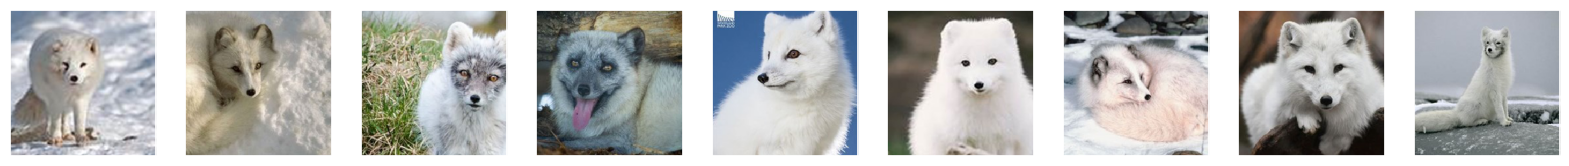

In [77]:
# Load 100 Artic fox training images and plot a subset of them
images, labels = load_images_from_path('Data/arctic-wildlife/train/arctic_fox', 0)
x_train += images
y_train += labels

show_images(images)

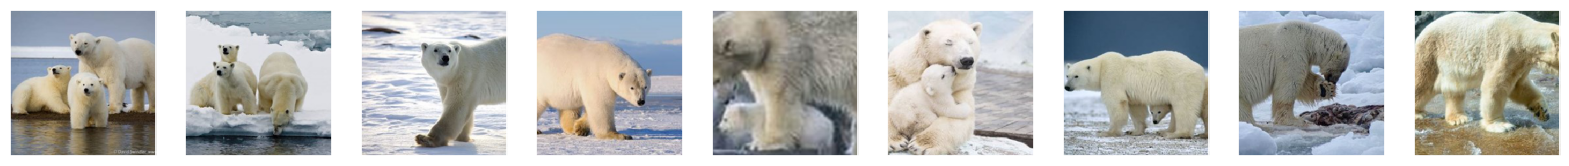

In [78]:
# Load 100 polar bear training images and plot a subset of them
images, labels = load_images_from_path('Data/arctic-wildlife/train/polar_bear', 1)
x_train += images
y_train += labels

show_images(images)

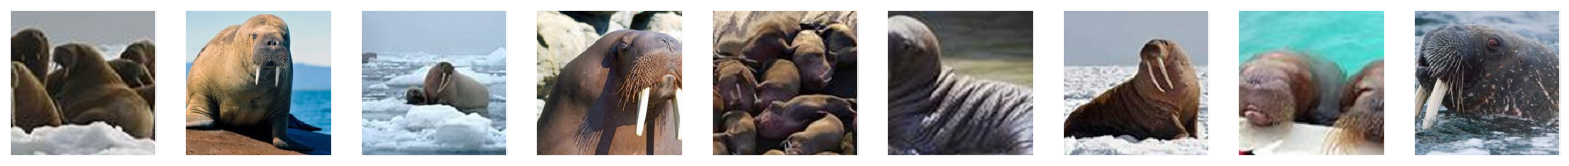

In [79]:
# Load 100 Walrus training images and plot a subset of them
images, labels = load_images_from_path('Data/arctic-wildlife/train/walrus', 2)
x_train += images
y_train += labels

show_images(images)

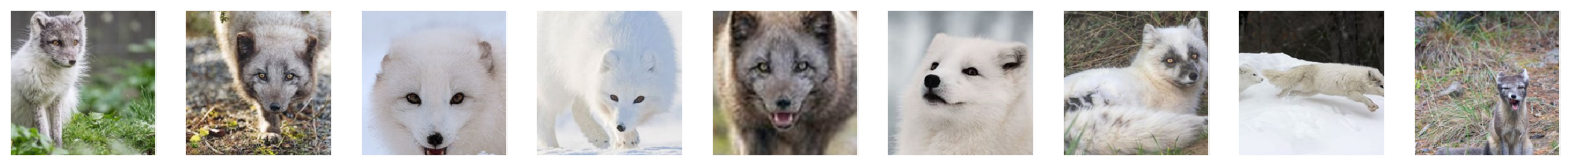

In [80]:
# Load images used to validate the CNN 
# Artic fox
images, labels = load_images_from_path('Data/arctic-wildlife/test/arctic_fox', 0)
x_test += images
y_test += labels

show_images(images)

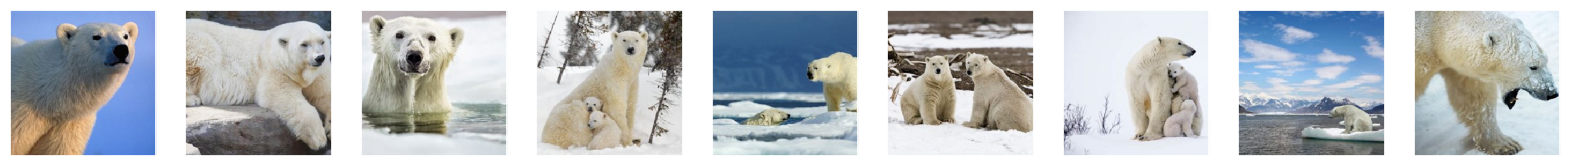

In [81]:
# Polar Bear
images, labels = load_images_from_path('Data/arctic-wildlife/test/polar_bear', 1)
x_test += images
y_test += labels

show_images(images)

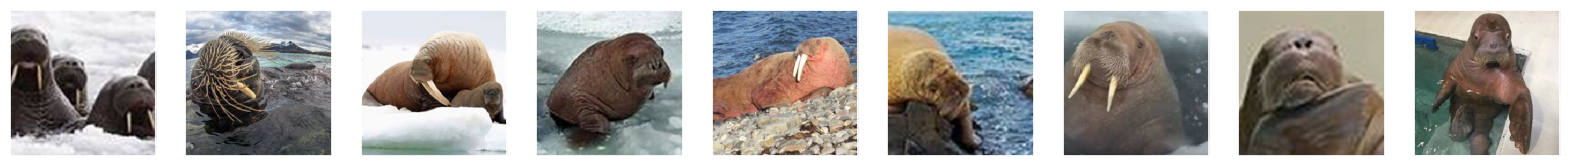

In [82]:
# Walrus
images, labels = load_images_from_path('Data/arctic-wildlife/test/walrus', 2)
x_test += images
y_test += labels

show_images(images)

In [83]:
# Normalize the training and testing images by dividing their pixel by 255
import numpy as np

x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

y_train = np.array(y_train)
y_test = np.array(y_test)

In [89]:
# Train a CNN, since images measure 224 x 224, we want the final feature map to compress as much imformation as possible into a small space. For this we'd use 5 pairs of CL and PLs to extract features from the train pairs at 5 resolutions 224 x 224, 111 x 111, 54 x 54, 26 x 26 and 12 x 12.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()
model.add(Input(shape=(224, 224, 3))) # 224 x 224 RGB image
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=80)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)                │ (None, 222, 222, 32)     │           896 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D)   │ (None, 111, 111, 32)     │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)                │ (None, 109, 109, 64)     │        18,496 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D)   │ (None, 54, 54, 64)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)                │ (None, 52, 52, 64)       │        36,928 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D)   │ (None, 26, 26, 64)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)                │ (None, 24, 24, 128)      │        73,856 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D)   │ (None, 12, 12, 128)      │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)                │ (None, 10, 10, 128)      │       147,584 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D)   │ (None, 5, 5, 128)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten_9 (Flatten)               │ (None, 3200)             │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_23 (Dense)                  │ (None, 1024)             │     3,277,824 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_24 (Dense)                  │ (None, 3)                │         3,075 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 3,558,659 (13.58 MB)

 Trainable params: 3,558,659 (13.58 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=20)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.3933 - loss: 1.1044 - val_accuracy: 0.4083 - val_loss: 1.0278
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4667 - loss: 1.0356 - val_accuracy: 0.5000 - val_loss: 1.0255
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6100 - loss: 0.8090 - val_accuracy: 0.6750 - val_loss: 0.7668
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6100 - loss: 0.8199 - val_accuracy: 0.6750 - val_loss: 0.7380
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6700 - loss: 0.6882 - val_accuracy: 0.6083 - val_loss: 0.7766
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6133 - loss: 0.7541 - val_accuracy: 0.6417 - val_loss: 0.8163
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7000 - loss: 0.6557 - val_accuracy: 0.6917 - val_loss: 0.7381
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7200 - loss: 0.5866 - val_accuracy: 0.5083 - v

[]

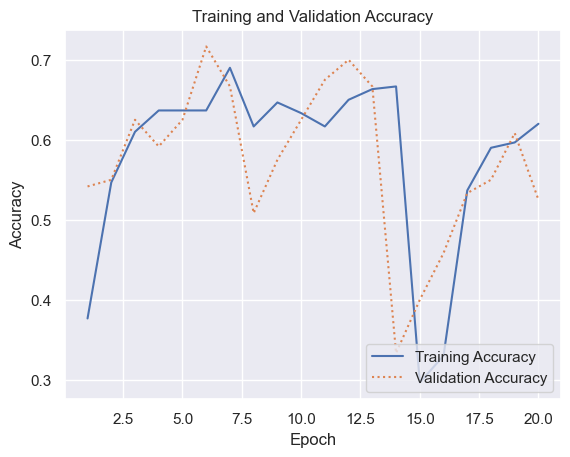

In [ ]:
# Plot training and validation accuracy
import seaborn as sns 
sns.set_theme()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()
